# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Import Data

In [2]:
# Distance matrix
distance = np.array([[0,     0.664,	 1.035,	 1.789,	4.854,	7.586,	11.425,	11.871],
                    [4.857,	      0,   0.852,	 1.606,	4.671,	7.403,	11.242,	11.688],
                    [4.004,	   4.23,	     0,	 0.753,	3.818,	 6.55,	10.389,	10.835],
                    [5.857,	  6.083,	 6.454,	     0,	3.064,	5.796,	 9.635,	10.081],
                    [7.267,	  7.493,	 7.864,	 4.066,	    0,	2.934,	 6.698,	 7.144],
                    [10.704,  10.93, 11.301,   7.503,	 3.68,	    0,	 5.619,	 6.065],
                    [13.475, 13.701,	14.072,	10.274,	6.451,	5.409,	     0,	 0.943],
                    [15.079, 15.305,	15.676,	11.878,	8.055,	7.013,	 1.603,	     0]])
kwargs = {'distance': distance}

dimensions = len(distance)-1
maxiters = 100
n_pop = 100
bounds = np.array([[0, 1]] * dimensions)
Mutation_rate = np.array([0.9, 0.5])
Crossover_rate = np.array([0.5, 0.1])


# Differential Evolutional Algorithm

In [3]:
def differential_evolution(objective_func, bounds, population_size=n_pop, max_generations=maxiters, Mutation_rate=Mutation_rate, Crossover_rate=Crossover_rate, **kwargs):
    # Initialize population
    population = np.random.uniform(bounds[:, 0], bounds[:, 1], (population_size, len(bounds)))
    global_solution = np.array([])
    Upperbound_Mutation = Mutation_rate[1]
    Lowerbound_Mutation = Mutation_rate[0]
    Upperbound_Crossover_rate = Crossover_rate[1]
    Lowerbound_Crossover_rate = Crossover_rate[0]
    F =  Mutation_rate[0]
    CR = Crossover_rate[0]
    for generation in range(max_generations):
        #print(f'Iteration {generation}')
        current_cost  = np.array([])
        F += (Upperbound_Mutation - Lowerbound_Mutation)/max_generations
        CR += (Upperbound_Crossover_rate - Lowerbound_Crossover_rate)/max_generations
        for i in range(population_size):
            # Mutation
            indices = [idx for idx in range(population_size) if idx != i]
            a, b, c = population[np.random.choice(indices, 3, replace=False)]
            mutant = population[i] + F * (b - c)

            # Crossover
            crossover_prob = np.random.rand(len(bounds))
            trial = np.where(crossover_prob < CR, mutant, population[i])

            # Selection
            fitness_trial = objective_func(trial, **kwargs)
            fitness_current = objective_func(population[i], **kwargs)

            if fitness_trial < fitness_current:
                population[i] = trial
                current_cost = np.insert(current_cost, len(current_cost), fitness_trial)
            else: 
                current_cost = np.insert(current_cost, len(current_cost), fitness_current)       
            print(f'population {i}')
            print(f'current_cost{current_cost}')
            print('---------'*30)
        best_index_plot = current_cost[np.argmin(current_cost)]
        global_solution = np.insert(global_solution, len(global_solution), best_index_plot)

        
    # Find the best solution
    best_index = np.argmin([objective_func(individual, **kwargs) for individual in population])
    best_solution = population[best_index]
    
    return best_solution, global_solution

# Objective Function Evolution

In [4]:

def objective_func(x, **kwargs):
    '''Decoding of each particles for obtaining routing solutions by argsort()'''
    seq = x.argsort() + 1 
    '''Calculate objective function for obtaining objective value of each particle'''
    j = f_per_particle(seq,  **kwargs)
    return np.array(j) 

def f_per_particle(m, **kwargs):
    X = m              # Sequence                              
    obj_val = preserving_strategy(X, **kwargs)        # Call Preserving strategy.
    return obj_val

def preserving_strategy(X, **kwargs):
    # distance matrix
    distance = kwargs['distance']
    # total distance starts from zero km.
    total_distance = 0
    # Vehicle travel from depot to customer i 
    total_distance += distance[0][X[0]]
    # Total distance of routing solution
    for i in range(len(X)-1):
        total_distance += distance[X[i]][X[i+1]]
    # Vehicle returns to depot
    total_distance += distance[X[-1]][0]
    # Return total distance (km.) that vehicle traveled 
    return total_distance

# Finding Solution

In [5]:
start_algorithm = time.time()
best_solution, global_solution_plot = differential_evolution(objective_func, bounds=bounds, population_size=n_pop, max_generations=maxiters, Mutation_rate=Mutation_rate, Crossover_rate=Crossover_rate, **kwargs)
End_algorithm = time.time()
run_algorithm = End_algorithm - start_algorithm

population 0
current_cost[63.032]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
population 1
current_cost[63.032 53.964]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
population 2
current_cost[63.032 53.964 34.053]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
population 3
current_cost[63.032 53.964 34.053 52.909]
---------

# Solution

In [6]:
best_solution

array([-0.21152267, -0.20650281,  0.36689323,  0.40086731,  0.55696021,
        2.14521385,  0.9796682 ])

In [7]:
routing = best_solution.argsort()+1
routing = np.insert(routing, len(routing), 0)
routing = np.insert(routing, 0, 0)
print(f' Routing: {routing}')

 Routing: [0 1 2 3 4 5 7 6 0]


In [8]:
print(f' Total distance {preserving_strategy(routing, **kwargs)} KM.')

 Total distance 29.41 KM.


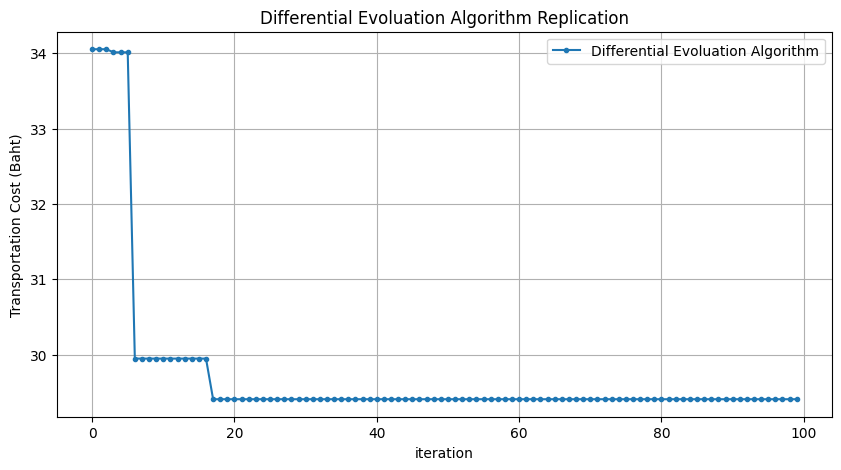

In [9]:
Replication =[i for i in range(len(global_solution_plot))]
y1 = global_solution_plot.tolist()
fig, ax = plt.subplots(1, figsize=(10,5))
ax.plot(Replication, y1, marker='.', label='Differential Evoluation Algorithm')
ax.set(xlabel='iteration', ylabel = 'Transportation Cost (Baht)', title = 'Differential Evoluation Algorithm Replication')
ax.grid()
ax.legend()
plt.show()